In [1]:
%matplotlib inline

import madmom
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio 

In [2]:
file = "../data/raw/train/ff123_eb_andul_short.wav"
Audio(file)

In [3]:
files = [
    "../data/raw/train/ff123_eb_andul_short.wav",
    "../data/raw/train/ff123_TheSource.wav"
]

In [4]:
sig = madmom.audio.signal.Signal(file)
fs = madmom.audio.signal.FramedSignal(sig)
stft = madmom.audio.stft.ShortTimeFourierTransform(fs)
spec = madmom.audio.spectrogram.Spectrogram(stft)
filt = madmom.audio.spectrogram.FilteredSpectrogram(spec, num_bands=24)
log = madmom.audio.spectrogram.LogarithmicSpectrogram(filt)
diff = madmom.audio.spectrogram.SpectrogramDifference(log, diff_max_bins=3, positive_diffs=True)
superflux_1 = np.mean(diff, axis=1)

In [5]:
spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogram(file, num_bands=24)
diff = madmom.audio.spectrogram.SpectrogramDifference(spec, diff_max_bins=3, positive_diffs=True)
superflux_2 = np.mean(diff, axis=1)

In [6]:
spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogramProcessor(num_bands=24)
diff = madmom.audio.spectrogram.SpectrogramDifferenceProcessor(diff_max_bins=3, positive_diffs=True)
# functions can also be used as processors!
from functools import partial
mean = partial(np.mean, axis=1)

superflux_seq_processor = madmom.processors.SequentialProcessor([spec, diff, mean])

In [7]:
class SuperFluxProcessor(madmom.processors.SequentialProcessor):
    
    def __init__(self, num_bands=24, diff_max_bins=3, positive_diffs=True):
        # define the processing chain
        spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogramProcessor(num_bands=num_bands)
        diff = madmom.audio.spectrogram.SpectrogramDifferenceProcessor(diff_max_bins=diff_max_bins,
                                                                       positive_diffs=positive_diffs)
        from functools import partial
        mean = partial(np.mean, axis=1)
        # sequentially process everything
        super(SuperFluxProcessor, self).__init__([spec, diff, mean])
        
superflux_processor = SuperFluxProcessor()

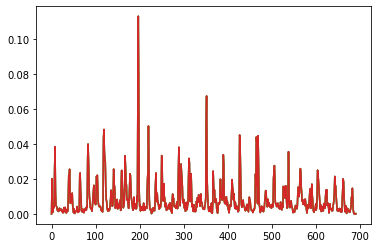

In [ ]:
superflux_3 = superflux_seq_processor.process(file)
superflux_4 = superflux_processor.process(file)

plt.figure()
plt.plot(superflux_1)
plt.plot(superflux_2)
plt.plot(superflux_3)
plt.plot(superflux_4)
plt.show()

In [ ]:
spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogramProcessor(num_bands=24)
diff = madmom.audio.spectrogram.SpectrogramDifferenceProcessor(diff_max_bins=3, positive_diffs=True)
# functions can also be used as processors!
from functools import partial
mean = partial(np.mean, axis=1)

superflux_seq_processor = madmom.processors.SequentialProcessor([spec, diff, mean])
superflux_seq_processor(file)

SpectrogramDifference([0.00000000e+00, 2.01562382e-02, 3.01894895e-03,
                       9.29407775e-04, 4.26256470e-03, 3.46257677e-03,
                       4.03511105e-03, 2.65432522e-02, 3.85360047e-02,
                       1.20890811e-02, 4.94000735e-03, 4.45531541e-03,
                       3.95994447e-03, 2.26831809e-03, 2.06580129e-03,
                       1.61741616e-03, 1.38809683e-03, 2.21518916e-03,
                       3.30979913e-03, 1.99542311e-03, 2.58922996e-03,
                       2.60782964e-03, 2.71225837e-03, 1.60518265e-03,
                       1.97324739e-03, 9.18878184e-04, 6.43083826e-04,
                       2.23545358e-03, 3.64607689e-03, 1.29647367e-03,
                       2.69983918e-03, 3.73728271e-03, 1.69361546e-03,
                       6.76240015e-04, 6.16840262e-04, 2.50577624e-03,
                       1.51396182e-03, 1.62904349e-03, 8.97568837e-03,
                       2.21596062e-02, 2.03098077e-02, 2.55937539e-02,
      

In [8]:
sig = madmom.audio.signal.Signal(file)
fs = madmom.audio.signal.FramedSignal(sig, fps=10)
stft = madmom.audio.stft.ShortTimeFourierTransform(fs)
spec = madmom.audio.spectrogram.Spectrogram(stft)
filt = madmom.audio.spectrogram.FilteredSpectrogram(spec, num_bands=24)
log = madmom.audio.spectrogram.LogarithmicSpectrogram(filt)
diff = madmom.audio.spectrogram.SpectrogramDifference(log, diff_max_bins=3, positive_diffs=True)
superflux_1 = np.mean(diff, axis=1)

In [9]:
len(sig)

305057

In [10]:
len(fs)

70

In [11]:
len(superflux_1)

70

In [12]:
act = madmom.features.ActivationsProcessor(mode="save", fps=10, sep="\n")

In [ ]:
with open("flux.txt", "w") as f:
    act(superflux_1, f)

In [ ]:
madmom.features.Activations("flux.txt", fps=10, sep="\n")

Activations([0.0000e+00, 7.6670e-02, 5.5900e-03, 4.3600e-03, 4.5470e-02,
             5.5120e-02, 1.7800e-03, 4.9670e-02, 3.3300e-03, 1.5930e-01,
             9.0650e-02, 6.1790e-02, 1.2356e-01, 4.3730e-02, 6.3370e-02,
             4.5630e-02, 5.0270e-02, 1.1146e-01, 5.3060e-02, 1.4180e-02,
             2.4493e-01, 1.0400e-03, 1.2111e-01, 1.0200e-03, 4.7000e-02,
             3.3310e-02, 4.0180e-02, 1.8900e-03, 8.3100e-03, 1.1795e-01,
             8.0970e-02, 1.2300e-03, 8.1380e-02, 3.7100e-03, 3.9510e-02,
             3.8700e-03, 1.0432e-01, 2.3280e-02, 5.8100e-03, 1.2648e-01,
             1.3480e-02, 1.1390e-02, 1.0490e-02, 1.1720e-01, 3.5500e-03,
             1.5450e-02, 7.4300e-03, 2.4346e-01, 2.1000e-04, 2.7510e-02,
             9.5200e-03, 1.0073e-01, 1.0830e-02, 6.5840e-02, 7.1310e-02,
             9.1100e-03, 2.5700e-02, 1.6801e-01, 6.6000e-04, 1.7070e-02,
             7.3600e-03, 7.1280e-02, 8.9500e-03, 2.4520e-02, 3.4600e-03,
             6.6500e-02, 5.7300e-03, 2.0040e-02, 1.

In [14]:
processor = madmom.processors.IOProcessor([SuperFluxProcessor()], [act])

In [ ]:
with open("flux.txt", "w") as f:
    processor(file, f)